In [12]:
import numpy as np

def vat_ordering(dissimilarity_matrix):
    """
    Implements the VAT Ordering and Display Algorithm
    :param dissimilarity_matrix: (n x n numpy array) A symmetric dissimilarity matrix
    :return: Ordered dissimilarity matrix (VAT reordered matrix)
    """
    n = dissimilarity_matrix.shape[0]
    K = list(range(n))
    I, J = [], K.copy()
    P = []

    # Step 2: Initialize
    max_index = np.unravel_index(np.argmax(dissimilarity_matrix), dissimilarity_matrix.shape)
    P.append(max_index[0])  # Initial index
    I.append(max_index[0])
    J.remove(max_index[0])

    # Step 3: Iterative reordering
    for _ in range(1, n):
        min_distance = float('inf')
        selected_index = None
        for j in J:
            min_dist = min([dissimilarity_matrix[j, i] for i in I])
            if min_dist < min_distance:
                min_distance = min_dist
                selected_index = j
        P.append(selected_index)
        I.append(selected_index)
        J.remove(selected_index)

    # Step 4: Reorder matrix
    ordered_matrix = dissimilarity_matrix[np.ix_(P, P)]

    return ordered_matrix, P

In [13]:
# Create a sample dissimilarity matrix
R = np.array([[0, 2, 9, 10],
              [2, 0, 6, 4],
              [9, 6, 10, 8],
              [10, 4, 8, 1]])
print("Before matrix:\n", R)
print("___________________________________________________________________________")
ordered_matrix, ordering = vat_ordering(R)

print("Ordered Dissimilarity Matrix:\n", ordered_matrix)
print("Ordering:", ordering)

Before matrix:
 [[ 0  2  9 10]
 [ 2  0  6  4]
 [ 9  6 10  8]
 [10  4  8  1]]
___________________________________________________________________________
Ordered Dissimilarity Matrix:
 [[ 0  2 10  9]
 [ 2  0  4  6]
 [10  4  1  8]
 [ 9  6  8 10]]
Ordering: [0, 1, 3, 2]


In [7]:
from sklearn import datasets
from sklearn.preprocessing import scale
X = scale(datasets.load_iris().data)

In [14]:
print("Before matrix:\n", X)
print("___________________________________________________________________________")
ordered_matrix, ordering = vat_ordering(X)

print("Ordered Dissimilarity Matrix:\n", ordered_matrix)
print("Ordering:", ordering)

Before matrix:
 [[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e

IndexError: index 15 is out of bounds for axis 1 with size 4

In [9]:
import numpy as np

def vat_ordering_rectangular(data_matrix):
    """
    Adapts VAT ordering for rectangular input (n x m).
    :param data_matrix: (n x m numpy array) Input matrix, not necessarily square.
    :return: Ordered matrix (row and column reordered)
    """
    # Step 1: Compute pairwise distances (example: rows)
    row_dissimilarity = np.linalg.norm(data_matrix[:, None, :] - data_matrix[None, :, :], axis=2)

    # Step 2: Apply VAT ordering on rows
    ordered_rows, row_order = vat_ordering(row_dissimilarity)

    # Step 3: Compute pairwise distances for columns
    column_dissimilarity = np.linalg.norm(data_matrix.T[:, None, :] - data_matrix.T[None, :, :], axis=2)

    # Step 4: Apply VAT ordering on columns
    ordered_columns, column_order = vat_ordering(column_dissimilarity)

    # Step 5: Rearrange original matrix by row and column order
    ordered_matrix = data_matrix[np.ix_(row_order, column_order)]

    return ordered_matrix, row_order, column_order

In [10]:
# Create a sample n x m matrix
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12]])

ordered_data, row_order, col_order = vat_ordering_rectangular(data)

print("Ordered Matrix:\n", ordered_data)
print("Row Order:", row_order)
print("Column Order:", col_order)

Ordered Matrix:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Row Order: [0, 1, 2, 3]
Column Order: [0, 1, 2]


In [11]:
ordered_data, row_order, col_order = vat_ordering_rectangular(X)

print("Ordered Matrix:\n", ordered_data)
print("Row Order:", row_order)
print("Column Order:", col_order)

Ordered Matrix:
 [[-1.74335684e+00 -1.62768839e+00 -1.39706395e+00 -1.18381211e+00]
 [-3.62176246e-01 -1.74885626e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.31979479e-01 -1.74885626e+00 -1.39706395e+00 -1.31544430e+00]
 [-1.31979479e-01 -1.87002413e+00 -1.51073881e+00 -1.44707648e+00]
 [ 9.82172869e-02 -1.50652052e+00 -1.28338910e+00 -1.31544430e+00]
 [ 3.28414053e-01 -1.50652052e+00 -1.34022653e+00 -1.31544430e+00]
 [ 3.28414053e-01 -1.38535265e+00 -1.39706395e+00 -1.31544430e+00]
 [ 3.28414053e-01 -1.38535265e+00 -1.22655167e+00 -1.31544430e+00]
 [ 3.28414053e-01 -1.74885626e+00 -1.39706395e+00 -1.31544430e+00]
 [ 9.82172869e-02 -1.26418478e+00 -1.22655167e+00 -1.31544430e+00]
 [ 9.82172869e-02 -1.14301691e+00 -1.28338910e+00 -1.31544430e+00]
 [ 9.82172869e-02 -1.14301691e+00 -1.28338910e+00 -1.44707648e+00]
 [-1.31979479e-01 -1.14301691e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.31979479e-01 -1.02184904e+00 -1.22655167e+00 -1.31544430e+00]
 [-1.31979479e-01 -1.26418478e+00 -1.34022653

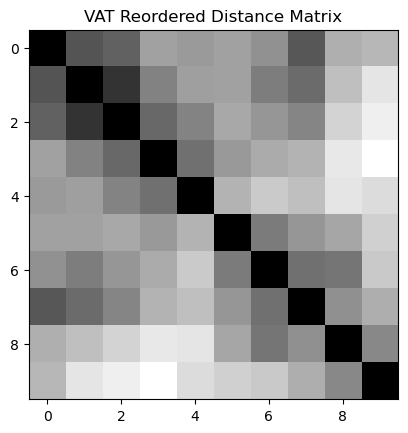

In [41]:
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

# Example rectangular matrix (rows are samples, columns are features)
data = np.random.rand(10, 5)

# Step 1: Compute the distance matrix
distance_matrix = ssd.squareform(ssd.pdist(data, 'euclidean'))

# Step 2: Apply VAT algorithm to reorder the distance matrix
def vat(input_matrix):
    #distance_matrix = np.matmul(distance_matrix, distance_matrix.T)
    distance_matrix = ssd.squareform(ssd.pdist(input_matrix, 'euclidean'))
    n = distance_matrix.shape[0]
    J = np.arange(n)
    I = [0]
    J = np.delete(J, 0)
    P = [0]
    for r in range(1, n):
        i = I[-1]
        d = distance_matrix[i, J]
        j = J[np.argmin(d)]
        I.append(j)
        J = np.delete(J, np.where(J == j))
        P.append(j)
    return distance_matrix[np.ix_(P, P)]

reordered_matrix = vat(distance_matrix)

# Step 3: Visualize the reordered distance matrix
plt.imshow(reordered_matrix, cmap='gray')
plt.title('VAT Reordered Distance Matrix')
plt.show()


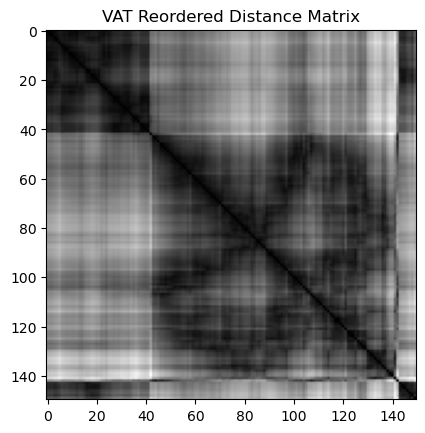

In [42]:
plt.imshow(vat(X), cmap='gray')
plt.title('VAT Reordered Distance Matrix')
plt.show()

In [15]:
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

def vat(input_matrix):
    #distance_matrix = np.matmul(distance_matrix, distance_matrix.T)
    distance_matrix = ssd.squareform(ssd.pdist(input_matrix, 'euclidean'))
    n = distance_matrix.shape[0]
    J = np.arange(n)
    I = [0]
    J = np.delete(J, 0)
    P = [0]
    for r in range(1, n):
        i = I[-1]
        d = distance_matrix[i, J]
        j = J[np.argmin(d)]
        I.append(j)
        J = np.delete(J, np.where(J == j))
        P.append(j)
    return distance_matrix[np.ix_(P, P)]
    
def save_map(map_data, fig_name='vat-reorder.png', fig_type='png'):
    fig, ax = plt.subplots()
    ax.imshow(map_data, cmap='gray')
    ax.set_title('VAT Reordered Distance Matrix')
    fig.savefig(fig_name, format=fig_type)

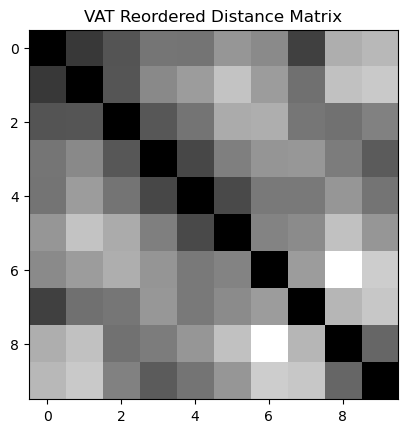

In [16]:
data = np.random.rand(10, 5)
reorder = vat(data)

save_map(reorder)

In [14]:
a.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_38552\1221896807.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  a.show()
